<h2 align= 'center'><b>TRAINING MODELS</b></h2>

#### **IMPORTING THE LIBRARIES**

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### **IMPORTING THE DATASET**

In [68]:
!pip install xlrd>=2.0.1

In [69]:
# loading encoded data and  naming it as data1

data1= pd.read_csv("E:\Employees_performance_analysis\src\models\data_encoded.csv")
data1

,Age,Gender,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,...,EmpJobRole_Research Director,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely
0,32,True,10,3,4,55,3,2,4,1,...,False,False,True,False,False,False,False,False,False,True
1,47,True,14,4,4,42,3,2,1,2,...,False,False,True,False,False,False,False,False,False,True
2,40,True,5,4,4,48,2,3,1,5,...,False,False,True,False,False,False,False,False,True,False
3,41,True,10,4,2,73,2,5,4,3,...,False,False,False,False,False,False,False,False,False,True
4,60,True,16,4,1,84,3,2,1,8,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,False,3,1,4,71,4,2,4,1,...,False,False,True,False,False,False,False,False,True,False
1196,37,True,10,2,4,80,4,1,4,3,...,False,False,False,False,True,False,False,False,False,True
1197,50,True,28,1,4,74,4,1,3,1,...,False,False,False,False,True,False,False,False,False,True
1198,34,False,9,3,4,46,2,3,2,1,...,False,False,False,False,False,False,False,False,False,True


#### **DOMAIN ANALYSIS**

1. ***EmpNumber:*** Unique identifier for each employee in the dataset.

2. ***Age:*** Age of the employee, providing insight into workforce demographics and potential correlations with attrition.

3. ***Gender:*** Gender of the employee, which may impact workplace dynamics and attrition patterns.

4. ***EducationBackground:*** The educational background of the employee, influencing skillset and career trajectory.

5. ***MaritalStatus:*** Marital status of the employee, potentially affecting work-life balance and job satisfaction.

6. ***EmpDepartment:*** Department in which the employee works, indicating job role and organizational structure.

7. ***EmpJobRole:*** Specific job role of the employee within their department, reflecting responsibilities and career path.

8. ***BusinessTravelFrequency:*** Frequency of business travel for the employee, impacting lifestyle and job satisfaction.

9. ***DistanceFromHome:*** Distance of employee's residence from the workplace, influencing commuting stress and retention.

10. ***EmpEducationLevel:*** Level of education attained by the employee, reflecting qualifications and potential for advancement.

11. ***EmpEnvironmentSatisfaction:*** Employee satisfaction with the work environment, affecting morale and turnover.

12. ***EmpHourlyRate:*** Hourly wage of the employee, a factor in compensation satisfaction and retention.

13. ***EmpJobInvolvement:*** Level of involvement and engagement in the job role, affecting performance and attrition risk.

14. ***EmpJobLevel:*** Level of hierarchy within the organization, indicating seniority and career progression.

15. ***EmpJobSatisfaction:*** Satisfaction level with the job role, impacting employee morale and retention.

16. ***NumCompaniesWorked:*** Number of companies the employee has previously worked for, indicating job stability and turnover risk.

17. ***OverTime:*** Whether the employee works overtime, influencing work-life balance and burnout.

18. ***EmpLastSalaryHikePercent:*** Percentage of the employee's last salary hike, affecting compensation satisfaction and retention.

19. ***EmpRelationshipSatisfaction:*** Satisfaction with relationships at work, influencing job satisfaction and likelihood of turnover.

20. ***TotalWorkExperienceInYears:*** Total work experience of the employee, influencing skill level and career trajectory.

21. ***TrainingTimesLastYear:*** Number of training sessions attended by the employee last year, indicating investment in skill development and career growth.

22. ***EmpWorkLifeBalance:*** Employee's perceived balance between work and personal life, affecting job satisfaction and retention.

23. ***ExperienceYearsAtThisCompany:*** Years of experience at the current company, indicating loyalty and potential for promotion.

24. ***ExperienceYearsInCurrentRole:*** Years of experience in the current job role, influencing expertise and potential for advancement.

25. ***YearsSinceLastPromotion:*** Time since the employee's last promotion, impacting career progression and job satisfaction.

26. ***YearsWithCurrManager:*** Years of tenure with the current manager, affecting job satisfaction and retention.

27. ***Attrition:*** This variable indicates whether the employee has left the company  or not.

28. ***PerformanceRating:*** Target variable for the given problem.  this is the performance rating assigned to the employee, influencing career development and potential for retention.

#### **FEATURES SELECTION**

##### **CHECKING PEARSON'S CORRELATION COEFFICIENT**

In [70]:
# fetching only continuous columns
# considering the previous assumption made in data exploratory part such that features with >=20 unique values are taken as continuous features
for column in data1.columns:
    if data1[column].nunique() >= 20:
        print(f'{column}: {data1[column].nunique()}')
        print("===================================================")              

Age: 43
DistanceFromHome: 29
EmpHourlyRate: 71
TotalWorkExperienceInYears: 29
ExperienceYearsAtThisCompany: 21


In [71]:
continuous_columns= data1[['Age', 'DistanceFromHome', 'EmpHourlyRate', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany']]

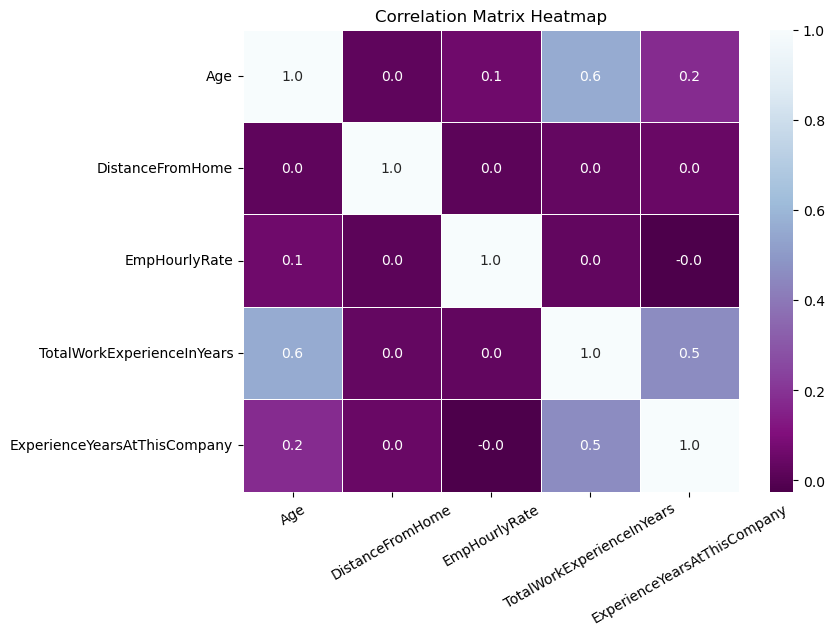

In [72]:
correlation_matrix = continuous_columns.corr()

# Creating a heatmap
plt.figure(figsize=(8, 6))
h= sns.heatmap(correlation_matrix, annot=True, cmap="BuPu_r", fmt=".1f", linewidths=0.5)
h.set_xticklabels(h.get_xticklabels(), rotation= 30)
plt.title("Correlation Matrix Heatmap")
plt.show()

##### Insights:
- All the continuous input features have less multi-collinearity among each other.
- Only the features **"TotalWorkExperienceInYears" and "Age"** are showing slightly higher correlation of above 0.5.
- So one of them could be removed, but **it would be better to consider their correlation with the target variable** before dropping of these features. 

##### **ANOVA TEST**

##### (Between continuous predictors and the categorical target variable)

In [73]:
# Defining a function to find the statistical relationship between target and the continuous input variables

def Anova(data, target, input_features):
  from scipy.stats import f_oneway

  # creating empty list to store the final selected input feaatures
  selected_input_features= []

  for column in input_features:
    features_group_list= data1.groupby(target)[column].apply(list)
    anova_result= f_oneway(*features_group_list)

    # If anova p-value is <0.05, we reject H0 and hence it will be taken as significant feature.

    if anova_result[1] < 0.05:
      print(f'- {column} IS CORRELATED with the {target}| p-value: {anova_result[1]}')
      print("==================================================================================================")
      selected_input_features.append(column)
    else:
      print(f'- {column} IS NOT CORRELATED with {target}| p-value: {anova_result[1]}')
      print("==================================================================================================")

  return(selected_input_features)

In [74]:
# calling the function to check which continuous variables are correlated with the target

print("ANOVA RESULTS:\n")
Anova(data1, 'PerformanceRating', input_features= ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany'])

ANOVA RESULTS:

- Age IS NOT CORRELATED with PerformanceRating| p-value: 0.3150808268898886
- DistanceFromHome IS NOT CORRELATED with PerformanceRating| p-value: 0.2786929213897704
- EmpHourlyRate IS NOT CORRELATED with PerformanceRating| p-value: 0.23633206407690707
- TotalWorkExperienceInYears IS CORRELATED with the PerformanceRating| p-value: 0.0028670488207405654
- ExperienceYearsAtThisCompany IS CORRELATED with the PerformanceRating| p-value: 3.8123602402513167e-06


['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany']

#### Insights:
- From the ANOVA  test, it is clear that among the continous predictors, only **TotalWorkExperienceInYears** and **ExperienceYearsAtThisCompany** are in high correlation with the target variable.
- Hence, columns like **Age, DistanceFromHome, EmpHourlyRate** are not correlated with the target variable.
- Hence these could be dropped.

##### **CHI-SQUARE TEST**

#### Between categorical predictors and the categorical target variable

In [75]:
# categorical_columns= discrete_features + binary_features + nominal_features 

In [76]:
len(data1.columns) # total number of columns

54

In [77]:
continuous_columns.columns # only these five features are continuous columns and the remaining input features come under categorical columns

Index(['Age', 'DistanceFromHome', 'EmpHourlyRate',
       'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany'],
      dtype='object')

In [78]:
categorical_columns= data1[['Gender', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel',
                            'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
                            'TrainingTimesLastYear', 'EmpWorkLifeBalance','ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager',
                            'Attrition', 'PerformanceRating', 'EducationBackground_Life Sciences', 'EducationBackground_Marketing','EducationBackground_Medical',
                            'EducationBackground_Other', 'EducationBackground_Technical Degree', 'MaritalStatus_Married', 'MaritalStatus_Single', 'EmpDepartment_Development',
                            'EmpDepartment_Finance', 'EmpDepartment_Human Resources', 'EmpDepartment_Research & Development', 'EmpDepartment_Sales','EmpJobRole_Data Scientist',
                            'EmpJobRole_Delivery Manager', 'EmpJobRole_Developer', 'EmpJobRole_Finance Manager', 'EmpJobRole_Healthcare Representative', 'EmpJobRole_Human Resources',
                            'EmpJobRole_Laboratory Technician', 'EmpJobRole_Manager', 'EmpJobRole_Manager R&D', 'EmpJobRole_Manufacturing Director', 'EmpJobRole_Research Director', 
                            'EmpJobRole_Research Scientist', 'EmpJobRole_Sales Executive', 'EmpJobRole_Sales Representative', 'EmpJobRole_Senior Developer', 'EmpJobRole_Senior Manager R&D',
                            'EmpJobRole_Technical Architect', 'EmpJobRole_Technical Lead', 'BusinessTravelFrequency_Travel_Frequently', 'BusinessTravelFrequency_Travel_Rarely']]
len(categorical_columns.columns)

49

In [79]:
# importing chi2_contingency from scipy.stats
from scipy.stats import chi2_contingency

target = data1['PerformanceRating']

# Constructing a contingency table between each categorical predictor and the target variable
# empty dictionary to store the statistic values
chi2_results = {}

for col in categorical_columns:
    contingency_table = pd.crosstab(categorical_columns[col], target)
    chi2_stat, p_val, dof, expected_freq = chi2_contingency(contingency_table)
    chi2_results[col] = {'Chi-square statistic': chi2_stat, 'p-value': p_val, 'Degrees of freedom': dof}

# Displaying the results for features with p-values less than 0.05
for col, result in chi2_results.items():
    if result['p-value'] < 0.05:
        print(f"Feature: {col}")
        print(f"Chi-square statistic: {result['Chi-square statistic']}")
        print(f"p-value: {result['p-value']}")
        print(f"Degrees of freedom: {result['Degrees of freedom']}")
        print("-===================================================")
    else:
        print(f'Feature: {col} | p-value: {result["p-value"]} > 0.05')
        print('---------------------------------------------------')          


Feature: Gender | p-value: 0.9217557495859275 > 0.05
---------------------------------------------------
Feature: EmpEducationLevel | p-value: 0.3114744353710753 > 0.05
---------------------------------------------------
Feature: EmpEnvironmentSatisfaction
Chi-square statistic: 325.54812593296936
p-value: 2.7264598025505243e-67
Degrees of freedom: 6
-===================================================
Feature: EmpJobInvolvement | p-value: 0.9399863300500411 > 0.05
---------------------------------------------------
Feature: EmpJobLevel | p-value: 0.1768674128646029 > 0.05
---------------------------------------------------
Feature: EmpJobSatisfaction | p-value: 0.06534321929959395 > 0.05
---------------------------------------------------
Feature: NumCompaniesWorked | p-value: 0.7380228598068068 > 0.05
---------------------------------------------------
Feature: OverTime
Chi-square statistic: 11.282450374168816
p-value: 0.0035485181432246523
Degrees of freedom: 2
-=====================

##### Insights:
- So the features having **p-value < 0.05** are as follows:
  - EmpEnvironmentSatisfaction
  - OverTime
  - EmpLastSalaryHikePercent
  - EmpWorkLifeBalance
  - ExperienceYearsInCurrentRole
  - YearsSinceLastPromotion
  - YearsWithCurrManager
  - EducationBackground_Other
  - EmpDepartment_Development
  - EmpDepartment_Finance
  - EmpDepartment_Sales
  - EmpJobRole_Developer
  - EmpJobRole_Finance Manager
  - EmpJobRole_Manager
  - EmpJobRole_Research Scientist
  -  EmpJobRole_Sales Executive
  - PerformanceRating

- The columns with higher p-value:
  - 'Gender', 'EmpEducationLevel', 'EmpJobInvolvement','EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpRelationshipSatisfaction', 'TrainingTimesLastYear',
   'Attrition',  'EducationBackground_Life Sciences', 'EducationBackground_Marketing', 'EducationBackground_Medical', 'EducationBackground_Technical Degree', 'MaritalStatus_Married', 'MaritalStatus_Single', 'EmpDepartment_Human Resources', 'EmpDepartment_Research & Development', 'EmpJobRole_Data Scientist', 'EmpJobRole_Delivery Manager', 'EmpJobRole_Healthcare Representative', 'EmpJobRole_Human Resources', 'EmpJobRole_Laboratory Technician', 'EmpJobRole_Manager R&D', 'EmpJobRole_Manufacturing Director', 'EmpJobRole_Research Director', 'EmpJobRole_Sales Representative', 'EmpJobRole_Senior Developer', 'EmpJobRole_Senior Manager R&D', 'EmpJobRole_Technical Architect', 'EmpJobRole_Technical Lead', 'BusinessTravelFrequency_Travel_Frequently', 'BusinessTravelFrequency_Travel_Rarely'

##### **NEW DATA IS CREATED AFTER DROPPING IRRELEVANT AND LESS CORRELATED PREDICTORS**

In [80]:
# data_fs--> data after feature selection

data_fs= data1[['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'EmpEnvironmentSatisfaction', 'OverTime', 'EmpLastSalaryHikePercent',
                'EmpWorkLifeBalance', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EducationBackground_Other',
                'EmpDepartment_Development', 'EmpDepartment_Finance', 'EmpDepartment_Sales', 'EmpJobRole_Developer', 'EmpJobRole_Finance Manager',
                'EmpJobRole_Manager', 'EmpJobRole_Research Scientist', 'EmpJobRole_Sales Executive', 'PerformanceRating']]

data_fs.head()

,TotalWorkExperienceInYears,ExperienceYearsAtThisCompany,EmpEnvironmentSatisfaction,OverTime,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationBackground_Other,EmpDepartment_Development,EmpDepartment_Finance,EmpDepartment_Sales,EmpJobRole_Developer,EmpJobRole_Finance Manager,EmpJobRole_Manager,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,PerformanceRating
0,10,10,4,0,12,2,7,0,8,False,False,False,True,False,False,False,False,True,3
1,20,7,4,0,12,3,7,1,7,False,False,False,True,False,False,False,False,True,3
2,20,18,4,1,21,3,13,1,12,False,False,False,True,False,False,False,False,True,4
3,23,5,2,0,15,2,6,12,6,False,False,False,False,False,False,True,False,False,3
4,10,2,1,0,14,3,2,2,2,False,False,False,True,False,False,False,False,True,3


In [81]:
len(data_fs.columns) # so there are 19 columns in the dataset after feature selection

19

In [82]:
# saving this data to a different csv file
data_fs.to_csv('data_fs.csv', index=False)

#### **SCALING**

In [83]:
# creaating a copy of data_fs for scaling
# mm_scaled_data-->MinMax scaled data

mm_scaled_data= data_fs.copy()
mm_scaled_data.head()


,TotalWorkExperienceInYears,ExperienceYearsAtThisCompany,EmpEnvironmentSatisfaction,OverTime,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationBackground_Other,EmpDepartment_Development,EmpDepartment_Finance,EmpDepartment_Sales,EmpJobRole_Developer,EmpJobRole_Finance Manager,EmpJobRole_Manager,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,PerformanceRating
0,10,10,4,0,12,2,7,0,8,False,False,False,True,False,False,False,False,True,3
1,20,7,4,0,12,3,7,1,7,False,False,False,True,False,False,False,False,True,3
2,20,18,4,1,21,3,13,1,12,False,False,False,True,False,False,False,False,True,4
3,23,5,2,0,15,2,6,12,6,False,False,False,False,False,False,True,False,False,3
4,10,2,1,0,14,3,2,2,2,False,False,False,True,False,False,False,False,True,3


In [84]:
# fetching only continuous columns for scaling

for column in mm_scaled_data:
    if mm_scaled_data[column].nunique() >= 20:
        print(f'{column}: {mm_scaled_data[column].nunique()}')
        print("============================================")

TotalWorkExperienceInYears: 29
ExperienceYearsAtThisCompany: 21


##### ***Splitting the data into X and y***

In [85]:
# Splitting the data into X and y
X= mm_scaled_data.drop('PerformanceRating', axis=1)
y= mm_scaled_data['PerformanceRating']

In [86]:
# splitting into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y, test_size= 0.2, random_state= 42)

In [87]:
# checking the shape 

print(f'X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}\ny_test shape: {y_test.shape}')

X_train shape: (960, 18)
X_test shape: (240, 18)
y_train shape: (960,)
y_test shape: (240,)


In [88]:
# using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaling= MinMaxScaler()
X_train[['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany']]= scaling.fit_transform(X_train[['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany']])
X_test[['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany']]= scaling.transform(X_test[['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany']])

In [91]:
X_test.head()

,TotalWorkExperienceInYears,ExperienceYearsAtThisCompany,EmpEnvironmentSatisfaction,OverTime,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationBackground_Other,EmpDepartment_Development,EmpDepartment_Finance,EmpDepartment_Sales,EmpJobRole_Developer,EmpJobRole_Finance Manager,EmpJobRole_Manager,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive
811,0.142857,0.10,3,1,15,3,2,2,2,False,True,False,False,False,False,False,False,False
1149,0.035714,0.05,3,1,18,1,0,0,0,False,True,False,False,True,False,False,False,False
662,0.428571,0.20,3,0,16,1,2,1,3,False,False,False,True,False,False,False,False,True
542,0.392857,0.20,2,0,15,3,3,1,2,False,False,True,False,False,True,False,False,False
858,0.428571,0.05,3,0,15,3,0,0,0,False,True,False,False,False,False,False,False,False


In [92]:
# coverting y_test into a dataframe and storing test dataset as a separate csv file.
y_test= pd.DataFrame(y_test, columns=['PerformanceRating'])
y_test.head()

,PerformanceRating
811,3
1149,3
662,2
542,2
858,3


In [93]:
# separate csv file for test data
test_data= pd.concat([X_test, y_test], axis= 1)
test_data.head()

,TotalWorkExperienceInYears,ExperienceYearsAtThisCompany,EmpEnvironmentSatisfaction,OverTime,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationBackground_Other,EmpDepartment_Development,EmpDepartment_Finance,EmpDepartment_Sales,EmpJobRole_Developer,EmpJobRole_Finance Manager,EmpJobRole_Manager,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,PerformanceRating
811,0.142857,0.10,3,1,15,3,2,2,2,False,True,False,False,False,False,False,False,False,3
1149,0.035714,0.05,3,1,18,1,0,0,0,False,True,False,False,True,False,False,False,False,3
662,0.428571,0.20,3,0,16,1,2,1,3,False,False,False,True,False,False,False,False,True,2
542,0.392857,0.20,2,0,15,3,3,1,2,False,False,True,False,False,True,False,False,False,2
858,0.428571,0.05,3,0,15,3,0,0,0,False,True,False,False,False,False,False,False,False,3


In [94]:
test_data.to_csv("test_data.csv", index= False)

#### **BALANCING THE DATASET**

In [95]:
# importing SMOTE--> oversampling technique
from imblearn.over_sampling import SMOTE
smote= SMOTE()
X_train_sm, y_train_sm= smote.fit_resample(X_train, y_train)


In [96]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_sm))

Counter({3: 699, 2: 155, 4: 106})
Counter({3: 699, 2: 699, 4: 699})


In [99]:
# storing processed data as a separate file for training models
processed_data= pd.concat([X_train_sm, y_train_sm], axis= 1)
processed_data.head()

,TotalWorkExperienceInYears,ExperienceYearsAtThisCompany,EmpEnvironmentSatisfaction,OverTime,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationBackground_Other,EmpDepartment_Development,EmpDepartment_Finance,EmpDepartment_Sales,EmpJobRole_Developer,EmpJobRole_Finance Manager,EmpJobRole_Manager,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,PerformanceRating
0,0.178571,0.20,3,0,14,3,2,1,3,False,False,False,True,False,False,False,False,True,3
1,0.178571,0.25,2,1,11,3,4,1,3,False,False,False,True,False,False,False,False,True,2
2,0.071429,0.10,4,0,18,2,2,2,1,False,False,False,False,False,False,False,True,False,3
3,0.214286,0.25,1,0,19,3,2,0,2,False,False,False,True,False,False,False,False,True,4
4,0.035714,0.05,3,0,18,3,0,0,0,False,False,False,True,False,False,False,False,False,3


In [100]:
processed_data.to_csv("processed_data.csv", index= False) # contains only training data for model

### **TRAINING MODELS**